## Venn diagrams

https://github.com/LankyCyril/pyvenn/blob/master/pyvenn-demo.ipynb

In [4]:
import sys
sys.path.append('/Users/jrm/Desktop/Foodome/pyTools/scripts/')

In [3]:
from venn import venn
import matplotlib.pyplot as plt

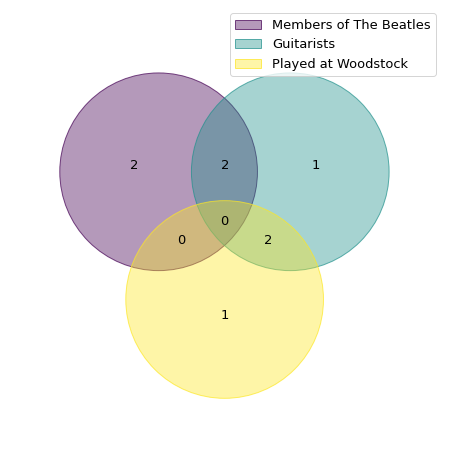

In [7]:
musicians = {
    "Members of The Beatles": {"Paul McCartney", "John Lennon", "George Harrison", "Ringo Starr"},
    "Guitarists": {"John Lennon", "George Harrison", "Jimi Hendrix", "Eric Clapton", "Carlos Santana"},
    "Played at Woodstock": {"Jimi Hendrix", "Carlos Santana", "Keith Moon"}
}
venn(musicians)
import matplotlib.pyplot as plt

In [11]:
from matplotlib.pyplot import subplots
from itertools import chain, islice
from string import ascii_uppercase
from numpy.random import choice

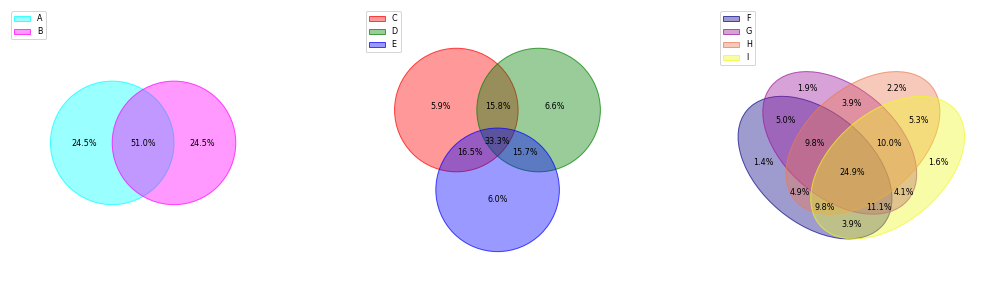

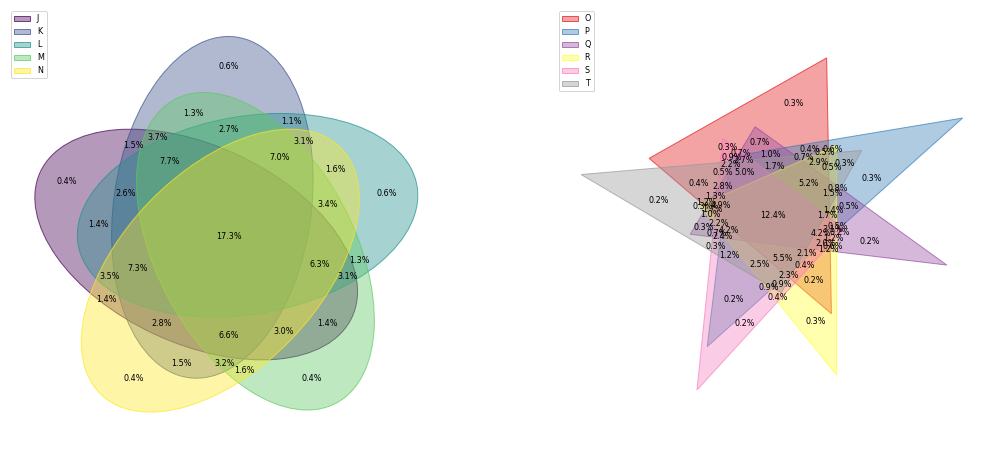

In [12]:
_, top_axs = subplots(ncols=3, nrows=1, figsize=(18, 5))
_, bot_axs = subplots(ncols=2, nrows=1, figsize=(18, 8))
cmaps = ["cool", list("rgb"), "plasma", "viridis", "Set1"]
letters = iter(ascii_uppercase)

for n_sets, cmap, ax in zip(range(2, 7), cmaps, chain(top_axs, bot_axs)):
    dataset_dict = {
        name: set(choice(1000, 700, replace=False))
        for name in islice(letters, n_sets)
    }
    venn(dataset_dict, fmt="{percentage:.1f}%", cmap=cmap, fontsize=8, legend_loc="upper left", ax=ax)

<AxesSubplot:>

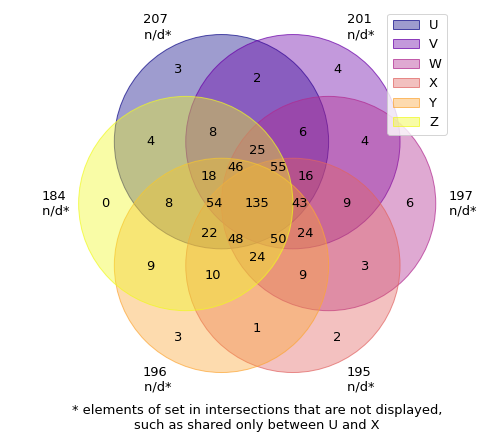

In [13]:
from venn import pseudovenn

dataset_dict = {
    name: set(choice(1000, 700, replace=False))
    for name in islice(letters, 6)
}
pseudovenn(dataset_dict, cmap="plasma")

In [14]:
from venn import generate_petal_labels, draw_venn, generate_colors

dataset_dict = {
    name: set(choice(1000, 250, replace=False))
    for name in list("αβγ")
}

petal_labels = generate_petal_labels(dataset_dict.values(), fmt="{size}")
petal_labels


{'001': '145',
 '010': '135',
 '011': '48',
 '100': '137',
 '101': '46',
 '110': '56',
 '111': '11'}

In [15]:
significance_filter = lambda value: value if int(value) >= 45 else "ns"
petal_labels = {
    logic: significance_filter(value)
    for logic, value in petal_labels.items()
}
for logic in "001", "010", "100":
    del petal_labels[logic]
petal_labels

{'011': '48', '101': '46', '110': '56', '111': 'ns'}

<AxesSubplot:>

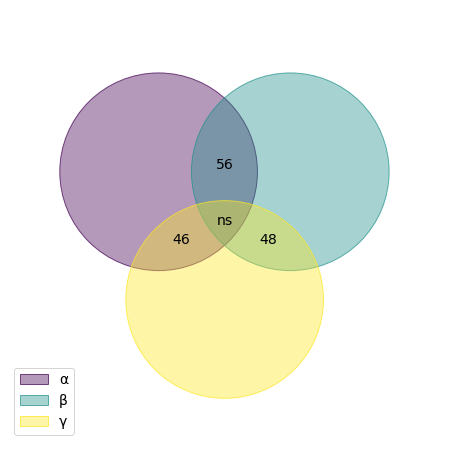

In [16]:
draw_venn(
    petal_labels=petal_labels, dataset_labels=dataset_dict.keys(),
    hint_hidden=False, colors=generate_colors(n_colors=3),
    figsize=(8, 8), fontsize=14, legend_loc="best", ax=None
)

## Alluvial/Sankey diagrams

https://github.com/vinsburg/alluvial_diagram

In [10]:
import alluvial
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np

In [12]:
# Generating the input_data:
seed=7
np.random.seed(seed)
def rand_letter(num): return chr(ord('A')+int(num*np.random.rand()))

input_data = [[rand_letter(15), rand_letter(5)*2,rand_letter(5)*3] for _ in range(50)]

input_data

[['B', 'DD', 'CCC'],
 ['K', 'EE', 'CCC'],
 ['H', 'AA', 'BBB'],
 ['H', 'DD', 'EEE'],
 ['F', 'AA', 'BBB'],
 ['N', 'BB', 'CCC'],
 ['N', 'AA', 'DDD'],
 ['O', 'BB', 'CCC'],
 ['N', 'AA', 'CCC'],
 ['L', 'DD', 'CCC'],
 ['D', 'CC', 'BBB'],
 ['H', 'BB', 'EEE'],
 ['L', 'BB', 'CCC'],
 ['E', 'CC', 'BBB'],
 ['J', 'BB', 'CCC'],
 ['K', 'CC', 'EEE'],
 ['C', 'DD', 'CCC'],
 ['G', 'DD', 'CCC'],
 ['G', 'AA', 'AAA'],
 ['K', 'CC', 'DDD'],
 ['O', 'DD', 'AAA'],
 ['E', 'CC', 'BBB'],
 ['O', 'EE', 'EEE'],
 ['H', 'EE', 'AAA'],
 ['E', 'CC', 'DDD'],
 ['H', 'AA', 'BBB'],
 ['E', 'BB', 'AAA'],
 ['G', 'CC', 'DDD'],
 ['L', 'CC', 'CCC'],
 ['L', 'EE', 'DDD'],
 ['M', 'EE', 'AAA'],
 ['N', 'BB', 'CCC'],
 ['L', 'DD', 'AAA'],
 ['J', 'AA', 'BBB'],
 ['M', 'CC', 'CCC'],
 ['K', 'EE', 'DDD'],
 ['A', 'CC', 'CCC'],
 ['A', 'CC', 'DDD'],
 ['M', 'EE', 'AAA'],
 ['D', 'DD', 'AAA'],
 ['D', 'CC', 'AAA'],
 ['L', 'EE', 'AAA'],
 ['H', 'DD', 'EEE'],
 ['E', 'AA', 'EEE'],
 ['N', 'AA', 'CCC'],
 ['K', 'EE', 'AAA'],
 ['J', 'EE', 'CCC'],
 ['C', 'AA', 

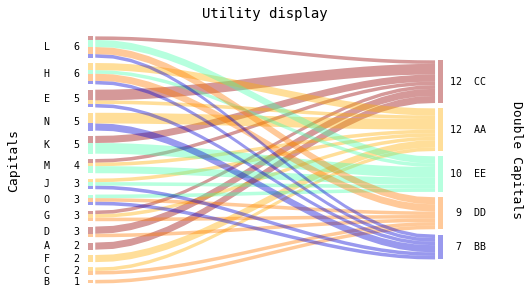

In [14]:
# Plotting:
cmap = matplotlib.cm.get_cmap('jet')
ax = alluvial.plot(
    input_data,  alpha=0.4, color_side=1, rand_seed=seed, figsize=(7,5),
    disp_width=True, wdisp_sep=' '*2, cmap=cmap, fontname='Monospace',
    labels=('Capitals', 'Double Capitals'), label_shift=2)
ax.set_title('Utility display', fontsize=14, fontname='Monospace')
plt.show()

In [25]:
alluvPrep = lambda x: tuple(x[0:2],x[1:3])

In [33]:
def alluvPrep(x):
    x = list(x)
    return 

In [57]:
res = []
for x in input_data:
    res.append([tuple(x[0:2]),tuple(x[1:3])])
#res = sum(res,[])

<AxesSubplot:>

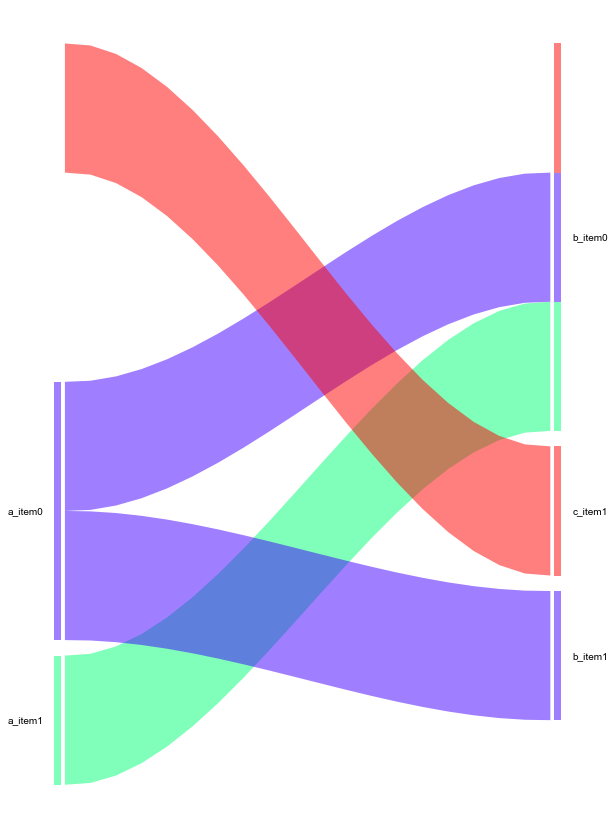

In [60]:
alluvial.plot( [('a_item0', 'b_item0'),
                ('a_item0', 'b_item1') ,
                ('b_item0', 'c_item1') ,
                ('a_item1', 'b_item0')] )

### Sankey diagram 

https://medium.com/kenlok/how-to-create-sankey-diagrams-from-dataframes-in-python-e221c1b4d6b0

In [63]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [67]:
import pandas as pd
import plotly
import chart_studio.plotly as py

In [84]:
df = pd.DataFrame([[rand_letter(15), 
               rand_letter(5)*2,
               rand_letter(5)*3] for _ in range(25)])
df['val']=np.random.randint(1,20,25)
df.columns = ['l1','l2','l3','val']
df.head()

,l1,l2,l3,val
0,L,AA,AAA,5
1,H,BB,AAA,8
2,G,AA,AAA,2
3,K,DD,BBB,9
4,F,EE,EEE,9


In [85]:
fig = genSankey(df,cat_cols=['l1','l2','l3'],value_cols='val',title='Sankey')
plotly.offline.plot(fig, validate=False)

'temp-plot.html'